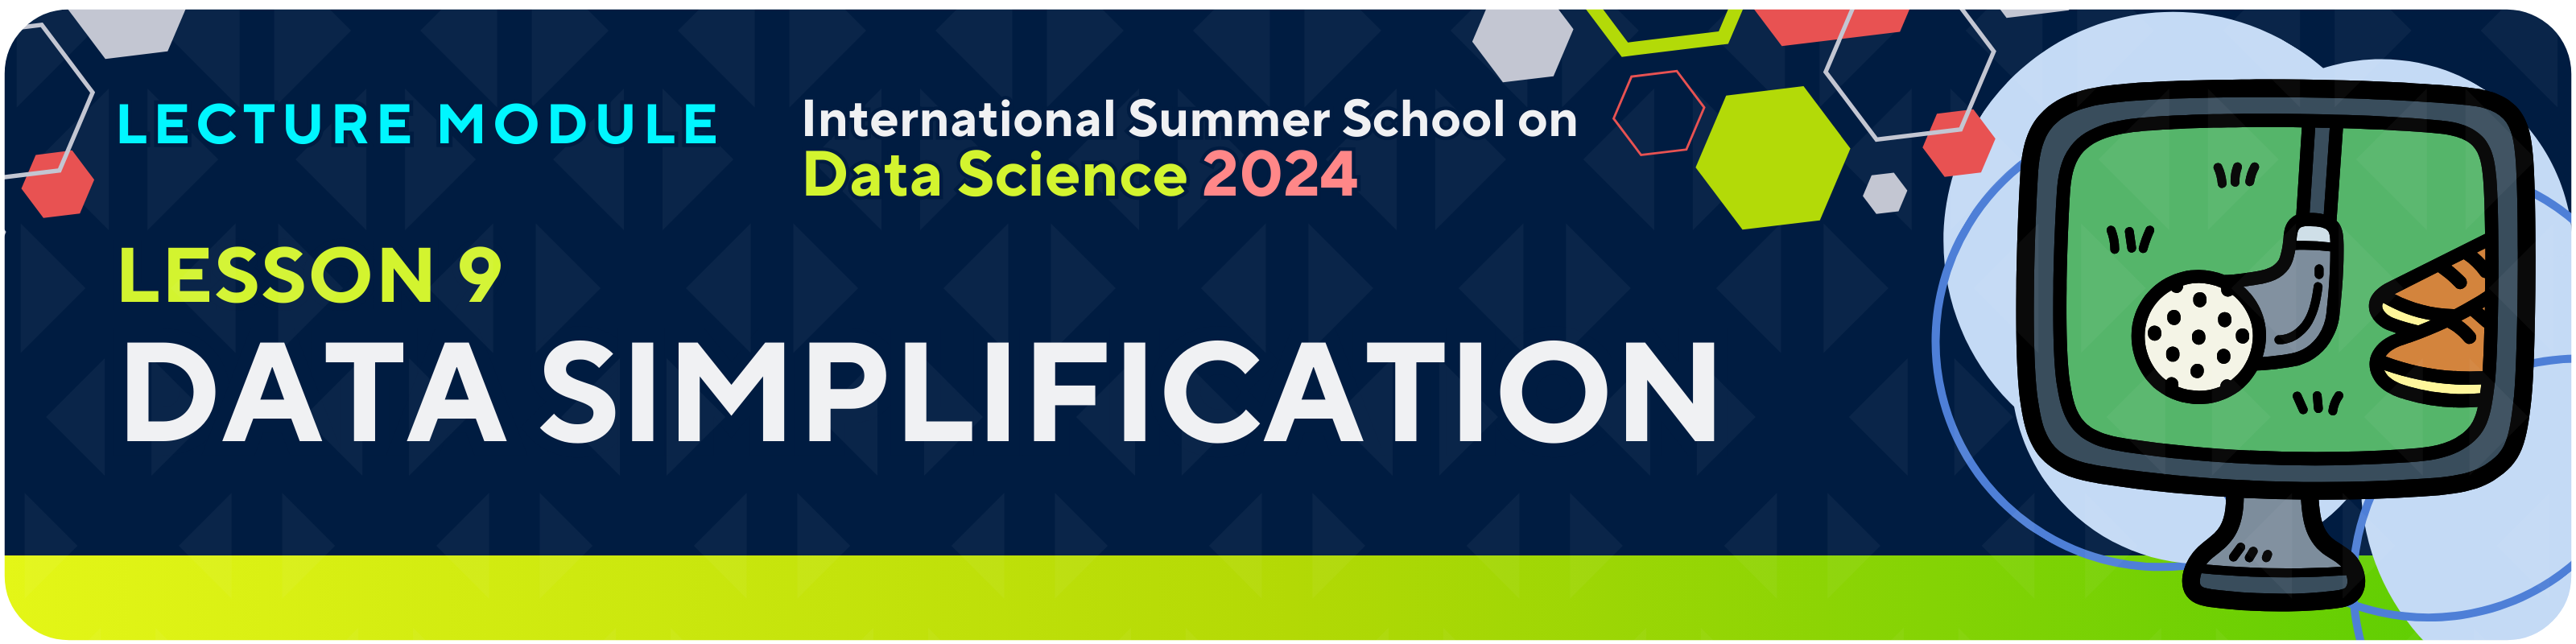

<div class='markdown-google-sans'>

## <font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**Data Simplification**
</div>

<img src="https://i.imgur.com/YOL0xHH.png" width=800 />

<img src="https://i.imgur.com/4QEKbRf.png" width=800 />

<img src="https://i.imgur.com/pEirq3L.png" width=800 />

In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

data = {
    'Temperature_Celsius': [15, 18, 22, 25, 28, 30, 32, 29, 26, 23, 20, 17],
    'Humidity_Percent': [50, 55, 60, 65, 70, 75, 80, 72, 68, 62, 58, 52],
    'Wind_Speed_kmh': [5, 8, 12, 15, 10, 7, 20, 18, 14, 9, 6, 11],
    'Golfers_Count': [20, 35, 50, 75, 100, 120, 90, 110, 85, 60, 40, 25],
    'Green_Speed': [8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 11.0, 10.5, 10.0, 9.5, 9.0]
}

# Create DataFrame from the dictionary
df = pd.DataFrame(data)

# Perform Power Transformation (Yeo-Johnson) for Green_Speed
# Initialize the Yeo-Johnson transformer
yj_transformer = PowerTransformer(method='yeo-johnson')

# Apply Yeo-Johnson transformation to all numeric columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
transformed_data = yj_transformer.fit_transform(df[numeric_columns])

# Create a new DataFrame with transformed data
df_transformed = pd.DataFrame(transformed_data, columns=[f"{col}_YeoJohnson" for col in numeric_columns])

# Combine original and transformed DataFrames
df_combined = pd.concat([df, df_transformed], axis=1)

# Print lambda values
print("Lambda values for each column:")
for col, lambda_value in zip(numeric_columns, yj_transformer.lambdas_):
    print(f"{col}: {lambda_value:.4f}")


# Display the first few rows of the combined DataFrame
print("\nFirst few rows of the combined DataFrame:")
print(df_combined.head())

Lambda values for each column:
Temperature_Celsius: 1.0417
Humidity_Percent: 0.3347
Wind_Speed_kmh: 0.0700
Golfers_Count: 0.5876
Green_Speed: 0.7901

First few rows of the combined DataFrame:
   Temperature_Celsius  Humidity_Percent  Wind_Speed_kmh  Golfers_Count  \
0                   15                50               5             20   
1                   18                55               8             35   
2                   22                60              12             50   
3                   25                65              15             75   
4                   28                70              10            100   

   Green_Speed  Temperature_Celsius_YeoJohnson  Humidity_Percent_YeoJohnson  \
0          8.5                       -1.655179                    -1.622126   
1          9.0                       -1.092677                    -0.991373   
2          9.5                       -0.336955                    -0.397061   
3         10.0                        0.2


<img src="https://i.imgur.com/pHyeaoB.png" width=800 />

<img src="https://i.imgur.com/FgYIy38.png" width=800 />

<img src="https://i.imgur.com/2yppkvu.png" width=800 />

<img src="https://i.imgur.com/aGomUfF.png" width=800 />

<div class='markdown-google-sans'>

## **09.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Feature Selection: Filter-Type**
</div>
<img src="https://i.imgur.com/Qrbprvp.png" width=800 />

<img src="https://i.imgur.com/3HWPXee.png" width=800 />

<img src="https://i.imgur.com/uIa9gZS.png" width=800 />

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>

<img src="https://i.imgur.com/IuiwfRY.png" width=800 />




In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.metrics         import accuracy_score
from sklearn.compose         import ColumnTransformer

# Load the dataset
data = {'Temperature':[58,70,52,56,93,83],
        'Humidity':[37,87,22,40,20,22],
        'Wind':[0,0,1,0,0,1],
        'NumPlayers':[37,43,32,33,36,30],
        'Play':[1,0,0,1,0,0]}

df = pd.DataFrame(data)

X_clf, y_clf = df.drop(['Play'], axis=1), df['Play']
X_reg, y_reg = df.drop(['NumPlayers','Play'], axis=1), df['NumPlayers']

# Make preprocessor
preprocessor_clf = ColumnTransformer([
    ('min_max', StandardScaler(), ['Temperature', 'Humidity', 'NumPlayers'])
    ], remainder='passthrough')

preprocessor_reg = ColumnTransformer([
    ('min_max', StandardScaler(), ['Temperature', 'Humidity'])
    ], remainder='passthrough')

X_clf_processed = preprocessor_clf.fit_transform(X_clf)
X_reg_processed = preprocessor_reg.fit_transform(X_reg)

print(pd.DataFrame(X_clf_processed).round(2))
print(pd.DataFrame(X_reg_processed).round(2))

      0     1     2    3
0 -0.71 -0.04  0.43  0.0
1  0.09  2.11  1.86  0.0
2 -1.11 -0.69 -0.75  1.0
3 -0.84  0.09 -0.51  0.0
4  1.62 -0.77  0.20  0.0
5  0.96 -0.69 -1.22  1.0
      0     1    2
0 -0.71 -0.04  0.0
1  0.09  2.11  0.0
2 -1.11 -0.69  1.0
3 -0.84  0.09  0.0
4  1.62 -0.77  0.0
5  0.96 -0.69  1.0


<div class='markdown-google-sans'>

### **Anova F-test**
</div>



<div class='markdown-google-sans'>

#### **Classification**
</div>

<img src="https://i.imgur.com/Uo8lHMN.png" width=800 />

<img src="https://i.imgur.com/dUFmbtl.png" width=800 />

<img src="https://i.imgur.com/duuFqL6.png" width=800 />

<img src="https://i.imgur.com/NnF3AvA.png" width=800 />

<img src="https://i.imgur.com/bf4wFs0.png" width=800 />

<img src="https://i.imgur.com/PJTz9Ml.png" width=800 />

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Make feature selection pipeline
feature_selection_pipeline = make_pipeline(
    preprocessor_clf,
    SelectKBest(f_classif, k=2)
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_clf, y_clf)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['selectkbest'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])

Selected Features:
 ['min_max__Temperature' 'remainder__Wind']


<div class='markdown-google-sans'>

#### **Regression**
</div>


<img src="https://i.imgur.com/ucORDCF.png" width=800 />

<img src="https://i.imgur.com/PEkKbHG.png" width=800 />

<img src="https://i.imgur.com/EGWmeta.png" width=800 />

<img src="https://i.imgur.com/S6LIXEw.png" width=800 />

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Make feature selection pipeline
feature_selection_pipeline = make_pipeline(
    preprocessor_reg,
    SelectKBest(f_regression, k=2)
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_reg, y_reg)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['selectkbest'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])

Selected Features:
 ['min_max__Humidity' 'remainder__Wind']


<div class='markdown-google-sans'>

### **Mutual Information**
</div>
<img src="https://i.imgur.com/U5rsjTc.png" width=800 />


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Make feature selection pipeline
feature_selection_pipeline = make_pipeline(
    preprocessor_clf,
    SelectKBest(mutual_info_classif, k=2)
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_clf, y_clf)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['selectkbest'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])

Selected Features:
 ['min_max__Temperature' 'min_max__Humidity']


In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

# Make feature selection pipeline
feature_selection_pipeline = make_pipeline(
    preprocessor_reg,
    SelectKBest(mutual_info_regression, k=2)
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_reg, y_reg)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['selectkbest'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])

Selected Features:
 ['min_max__Humidity' 'remainder__Wind']


<div class='markdown-google-sans'>

### **Chi-square Test**
</div>
<img src="https://i.imgur.com/bSuMsKJ.png" width=800 />



In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Make feature selection pipeline
feature_selection_pipeline = make_pipeline(
    #preprocessor_clf, # No preprocessing needed
    SelectKBest(chi2, k=2)
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_clf, y_clf)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['selectkbest'].get_support()
all_features = X_clf.columns
print("Selected Features:\n", all_features[selected_features])

Selected Features:
 Index(['Temperature', 'Wind'], dtype='object')


<img src="https://i.imgur.com/EScTA7W.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Filter-type (Classification) Summarized**
</div>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_classif,  mutual_info_classif, chi2
from sklearn.ensemble          import RandomForestClassifier

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play', 'NumPlayers'], axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a feature selection pipeline
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(f_classif, k=5)),  # mutual_info_classif, chi2
  # ('selector', SelectPercentile(f_classif, percentile=50)),  # choose top 50% instead
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)

# Make a training pipeline
training_pipeline = make_pipeline(
    RandomForestClassifier(random_state=0)
)

# Cross-validate the model using the selected features
scores = cross_val_score(training_pipeline, X_train_selected, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )

# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# (Optional) Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

Cross-Validation Accuracy: 0.75 ± 0.04
Final Test Accuracy: 0.675
Selected Features:
 ['ohe__Outlook_sunny' 'std__TemperatureMin' 'std__ChanceOfRain'
 'std__CloudCover' 'std__Holiday']


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Filter-type (Regression) Summarized**
</div>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import mean_squared_error

from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import f_regression,  mutual_info_regression, chi2
from sklearn.ensemble          import RandomForestRegressor

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play', 'NumPlayers'], axis=1), df['NumPlayers']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a feature selection pipeline
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(f_regression, k=4)),  # mutual_info_regression
    # ('selector', SelectPercentile(f_regression, percentile=40)),  # choose top 40% instead
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)

# Make a training pipeline
training_pipeline = make_pipeline(
    RandomForestRegressor(random_state=0)
)

# Cross-validate the model using the selected features
scores = cross_val_score(training_pipeline, X_train_selected, y_train, cv=3, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE: {-np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")

# (Optional) Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

Cross-Validation RMSE: 4.673 ± 2.138
Final Test RMSE: 4.549
Selected Features:
 ['ohe__Outlook_sunny' 'std__ChanceOfRain' 'std__CloudCover' 'std__Holiday']


<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 09-1**
</div>

Perform feature selection using mutual information for the following dataset. Choose top 25% features and print the selected features.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.ensemble      import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, SelectPercentile

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
practice_df = pd.read_csv(dataset_url, index_col='Date')

# Set target variable
X, y = practice_df.drop('Outlook', axis=1), practice_df['Outlook']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Make a preprocessor
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Make feature selection pipeline
feature_selection_pipeline = make_pipeline(
    preprocessor_clf,
    SelectKBest(mutual_info_classif, k=2),
    ('selector', SelectPercentile(f_regression, percentile=0.25))  #####.....
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_clf, y_clf)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['selectkbest'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])


AttributeError: This 'Pipeline' has no attribute 'fit_transform'

---
---

<div class='markdown-google-sans'>

## **09.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Feature Selection: Embedded-Type**
</div>
<img src="https://i.imgur.com/qvgjE2O.png" width=800 />



<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>

<img src="https://i.imgur.com/IuiwfRY.png" width=800 />




In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.metrics         import accuracy_score
from sklearn.compose         import ColumnTransformer

# Load the dataset
data = {'Temperature':[58,70,52,56,93,83],
        'Humidity':[37,87,22,40,20,22],
        'Wind':[0,0,1,0,0,1],
        'NumPlayers':[37,43,32,33,36,30],
        'Play':[1,0,0,1,0,0]}

df = pd.DataFrame(data)

X_clf, y_clf = df.drop(['Play'], axis=1), df['Play']
X_reg, y_reg = df.drop(['NumPlayers','Play'], axis=1), df['NumPlayers']

# Make preprocessor
preprocessor_clf = ColumnTransformer([
    ('std', StandardScaler(), ['Temperature', 'Humidity', 'NumPlayers'])
    ], remainder='passthrough')

preprocessor_reg = ColumnTransformer([
    ('std', StandardScaler(), ['Temperature', 'Humidity'])
    ], remainder='passthrough')

X_clf_processed = preprocessor_clf.fit_transform(X_clf)
X_reg_processed = preprocessor_reg.fit_transform(X_reg)

print(pd.DataFrame(X_clf_processed))
print(pd.DataFrame(X_reg_processed))

<div class='markdown-google-sans'>

### **Tree-based Models**
</div>
<img src="https://i.imgur.com/WmsycOO.png" width=800 />

<img src="https://i.imgur.com/6vagWfj.png" width=800 />

<img src="https://i.imgur.com/PHl4m82.png" width=800 />

<img src="https://i.imgur.com/IbRDCW5.png" width=800 />

<img src="https://i.imgur.com/Z7tkFEW.png" width=800 />

<img src="https://i.imgur.com/8tWzjer.png" width=800 />

<img src="https://i.imgur.com/DcnoSmV.png" width=800 />




In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble          import RandomForestClassifier

# Make feature selection pipeline
# threshold='mean': This selects features whose importance scores are greater
#                   than the mean of all the feature importance scores.
feature_selection_pipeline = make_pipeline(
    preprocessor_clf,
    SelectFromModel(RandomForestClassifier(random_state=42), threshold='mean')
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_clf, y_clf)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['selectfrommodel'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])

<img src="https://i.imgur.com/WlKbrvO.png" width=800 />


<div class='markdown-google-sans'>

### **Lasso Regression Models**
</div>
<img src="https://i.imgur.com/Dh86i7c.png" width=800 />

<img src="https://i.imgur.com/bc1ObP8.png" width=800 />

<img src="https://i.imgur.com/Zh4bhaa.png" width=800 />

<img src="https://i.imgur.com/VhMo4Iw.png" width=800 />

<img src="https://i.imgur.com/oJztJiu.png" width=800 />

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model      import Lasso, LassoCV

# Make feature selection pipeline
feature_selection_pipeline = make_pipeline(
    preprocessor_reg,
    SelectFromModel(LassoCV(random_state=42)) # By default, 5-fold cross validation
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_reg, y_reg)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['selectfrommodel'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])

# Print the alpha (regularization parameter) selected by LassoCV
lasso_model = feature_selection_pipeline.named_steps['selectfrommodel'].estimator_
print(f"Selected Alpha: {lasso_model.alpha_}")

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model      import ElasticNet, ElasticNetCV

# Make feature selection pipeline
feature_selection_pipeline = make_pipeline(
    preprocessor_reg,
    SelectFromModel(ElasticNetCV(random_state=42)) # By default, 5-fold cross validation
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_reg, y_reg)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['selectfrommodel'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])

# Print the parameters chosen by ElasticNetCV
elastic_net_model = feature_selection_pipeline.named_steps['selectfrommodel'].estimator_
print(f"Selected Alpha: {elastic_net_model.alpha_}")
print(f"Selected L1 Ratio: {elastic_net_model.l1_ratio_}")

<img src="https://i.imgur.com/0NT8kvB.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Embedded-type (Classification) Summarized**
</div>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.feature_selection import SelectFromModel
from sklearn.tree              import DecisionTreeClassifier
from sklearn.ensemble          import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model      import LogisticRegression, LogisticRegressionCV

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play', 'NumPlayers'], axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a feature selection pipeline
selector = RandomForestClassifier()  # GradientBoostingClassifier(), DecisionTreeClassifier()
#selector = LogisticRegression(penalty='l1', max_iter=10000, solver='saga')
#selector = LogisticRegressionCV(penalty='l1', max_iter=10000, solver='saga')
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectFromModel(selector)),
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)

# Make a training pipeline
training_pipeline = make_pipeline(
    RandomForestClassifier(random_state=0)
)

# Cross-validate the model using the selected features
scores = cross_val_score(training_pipeline, X_train_selected, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# (Optional) Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Embedded-type (Regression) Summarized**
</div>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import mean_squared_error

from sklearn.feature_selection import SelectFromModel
from sklearn.tree              import DecisionTreeRegressor
from sklearn.ensemble          import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model      import Lasso, LassoCV, ElasticNet, ElasticNetCV

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play', 'NumPlayers'], axis=1), df['NumPlayers']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a feature selection pipeline
# selector = RandomForestRegressor()  # GradientBoostingRegressor(), DecisionTreeRegressor()
selector = Lasso()  # LassoCV(), ElasticNet(), ElasticNetCV()
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectFromModel(selector)),
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)

# Make a training pipeline
training_pipeline = make_pipeline(
    RandomForestRegressor(random_state=0)
)

# Cross-validate the model using the selected features
scores = cross_val_score(training_pipeline, X_train_selected, y_train, cv=3, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE: {-np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")

# (Optional) Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 09-2**
</div>

Perform feature selection using LogisticRegressionCV with `penalty='l1'` for the following multiclass classification task and print the selected columns.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.linear_model  import LogisticRegressionCV
from sklearn.ensemble      import RandomForestClassifier

from sklearn.feature_selection import SelectFromModel

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
practice_df = pd.read_csv(dataset_url, index_col='Date')

# Set target variable
X, y = practice_df.drop('Outlook', axis=1), practice_df['Outlook']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Make a preprocessor
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')




---
---

<div class='markdown-google-sans'>

## **09.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Feature Selection: Wrapper-Type**
</div>
<img src="https://i.imgur.com/UoRWKW8.png" width=800 />


<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>


<img src="https://i.imgur.com/ByO2awS.png" width=800 />



In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.metrics         import accuracy_score
from sklearn.compose         import ColumnTransformer

# Load the dataset
data = {'Temperature':[58,70,52,56,93,83],
        'Humidity':[37,87,22,40,20,22],
        'Wind':[0,0,1,0,0,1],
        'NumPlayers':[37,43,32,33,36,30],
        'Play':[1,0,0,1,0,0]}

df = pd.DataFrame(data)

X_clf, y_clf = df.drop(['Play'], axis=1), df['Play']

# Make preprocessor
preprocessor_clf = ColumnTransformer([
    ('std', StandardScaler(), ['Temperature', 'Humidity', 'NumPlayers'])
    ], remainder='passthrough')

X_clf_processed = preprocessor_clf.fit_transform(X_clf)

print(pd.DataFrame(X_clf_processed))

<div class='markdown-google-sans'>

### **Recursive Feature Elimination**
</div>

<img src="https://i.imgur.com/lskAbbm.png" width=800 />

<img src="https://i.imgur.com/FdKkOw4.png" width=800 />

<img src="https://i.imgur.com/p49r27u.png" width=800 />

<img src="https://i.imgur.com/dCW28kW.png" width=800 />

<img src="https://i.imgur.com/c53wIDl.png" width=800 />

<img src="https://i.imgur.com/R3wXv0Y.png" width=800 />


In [ ]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble          import RandomForestClassifier

# Make feature selection pipeline
estimator = RandomForestClassifier(random_state=0)
feature_selection_pipeline = make_pipeline(
    preprocessor_clf,
    RFE(estimator, n_features_to_select=2)
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_clf, y_clf)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['rfe'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])

<div class='markdown-google-sans'>

### **Sequential Feature Selection**
</div>
<img src="https://i.imgur.com/8DokiXJ.png" width=800 />

<img src="https://i.imgur.com/18kVWFj.png" width=800 />

<img src="https://i.imgur.com/nkbbNZR.png" width=800 />

<img src="https://i.imgur.com/L7TbR28.png" width=800 />

<img src="https://i.imgur.com/t8Z3hSi.png" width=800 />

<img src="https://i.imgur.com/PlEB2xj.png" width=800 />

<img src="https://i.imgur.com/nMiDy6w.png" width=800 />


In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble          import RandomForestClassifier

# Make feature selection pipeline
estimator = RandomForestClassifier(random_state=42)
feature_selection_pipeline = make_pipeline(
    preprocessor_clf,
    SequentialFeatureSelector(estimator, n_features_to_select=2, cv=2)
)

# Fit the feature selection pipeline on the data
X_selected = feature_selection_pipeline.fit_transform(X_clf, y_clf)

# Print the selected features
selected_features = feature_selection_pipeline.named_steps['sequentialfeatureselector'].get_support()
all_features = feature_selection_pipeline.named_steps['columntransformer'].get_feature_names_out()
print("Selected Features:\n", all_features[selected_features])

<img src="https://i.imgur.com/KhFWWY5.png" width=800 />


<img src="https://i.imgur.com/TXPnmwC.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Wrapper-type (Classification) Summarized**
</div>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from sklearn.ensemble          import RandomForestClassifier


# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play', 'NumPlayers'], axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a feature selection pipeline
estimator = RandomForestClassifier()
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    #('selector', RFE(estimator, n_features_to_select=4)), # Select 4 Features
    #('selector', RFE(estimator, n_features_to_select=0.4)), # Select Top 40% Features
    ('selector', RFECV(estimator, cv=3)),  # The number of features selected is tuned automatically
    #('selector', SequentialFeatureSelector(estimator, n_features_to_select=4,
    #                                        direction='forward')),  # 'backward'
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)

# Make a training pipeline
training_pipeline = make_pipeline(
    RandomForestClassifier(random_state=0)
)

# Cross-validate the model using the selected features
scores = cross_val_score(training_pipeline, X_train_selected, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# (Optional) Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Wrapper-type (Regression) Summarized**
</div>
(This code takes around 2 minutes to run)

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import mean_squared_error

from sklearn.feature_selection import RFE, RFECV, SequentialFeatureSelector
from sklearn.ensemble          import RandomForestRegressor, GradientBoostingRegressor

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play', 'NumPlayers'], axis=1), df['NumPlayers']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a feature selection pipeline
estimator = RandomForestRegressor()
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    #('selector', RFE(estimator, n_features_to_select=4)),
    #('selector', RFE(estimator, n_features_to_select=0.4)), # Select Top 40% Features
    #('selector', RFECV(estimator, cv=3)),  # The number of features selected is tuned automatically
    ('selector', SequentialFeatureSelector(estimator, n_features_to_select=4,
                                            direction='forward')),  # 'backward'
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)

# Make a training pipeline
training_pipeline = make_pipeline(
    RandomForestRegressor(random_state=0)
)

# Cross-validate the model using the selected features
scores = cross_val_score(training_pipeline, X_train_selected, y_train, cv=3, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE: {-np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")

# (Optional) Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 09-3**
</div>

Perform feature selection using RFE using GradientBoostingClassifier with 5 columns to select for the following dataset. Print the selected features.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier

from sklearn.feature_selection import RFE

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
practice_df = pd.read_csv(dataset_url, index_col='Date')

# Set target variable
X, y = practice_df.drop('Outlook', axis=1), practice_df['Outlook']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Make a preprocessor
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a feature selection pipeline
estimator = RandomForestClassifier()
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', RFE(estimator, n_features_to_select=5)), # Select 4 Features
    #('selector', RFE(estimator, n_features_to_select=0.4)), # Select Top 40% Features
    ('selector', RFECV(estimator, cv=3)),  # The number of features selected is tuned automatically
    #('selector', SequentialFeatureSelector(estimator, n_features_to_select=4,
    #                                        direction='forward')),  # 'backward'
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)

# Make a training pipeline
training_pipeline = make_pipeline(
    RandomForestClassifier(random_state=0)
)



# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# (Optional) Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

---
---

<div class='markdown-google-sans'>

## **09.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Dimensionality Reduction: for Feature Reduction**
</div>



<img src="https://i.imgur.com/XrigDuz.png" width=800 />



<img src="https://i.imgur.com/W4XyQ7p.png" width=800 />

<img src="https://i.imgur.com/Pj1Tyfz.png" width=800 />


<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>

<img src="https://i.imgur.com/KGnkcA2.png" width=800 />


In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler, OneHotEncoder
from sklearn.pipeline        import make_pipeline
from sklearn.metrics         import accuracy_score
from sklearn.compose         import ColumnTransformer

# Load the dataset
data = {'Temperature':[58,70,52,56,93,83],
        'Humidity':[37,87,22,40,20,22],
        'Wind':[0,0,1,0,0,1],
        'NumPlayers':[37,43,32,33,36,30],
        'Play':[1,0,0,1,0,0]}

df = pd.DataFrame(data)

X_clf, y_clf = df.drop(['Play'], axis=1), df['Play']

# Make preprocessor
preprocessor_clf = ColumnTransformer([
    ('std', StandardScaler(), ['Temperature', 'Humidity', 'Wind', 'NumPlayers'])
    ], remainder='passthrough')

X_clf_processed = preprocessor_clf.fit_transform(X_clf)

print(pd.DataFrame(X_clf_processed))

<div class='markdown-google-sans'>

### **<font color=#819A00> Principal Component Analysis (PCA)**
</div>

<img src="https://i.imgur.com/e04NlnB.png" width=800 />

<img src="https://i.imgur.com/OHB9qCx.png" width=800 />

<img src="https://i.imgur.com/57sxpMu.png" width=800 />

<img src="https://i.imgur.com/5imXw57.png" width=800 />

<img src="https://i.imgur.com/paCHo2y.png" width=800 />

<img src="https://i.imgur.com/ggrebq7.png" width=800 />

<img src="https://i.imgur.com/coGUln9.png" width=800 />


In [ ]:
from sklearn.decomposition import PCA

# Make feature selection pipeline
dim_reduc_pipeline = make_pipeline(
    preprocessor_clf,
    PCA(n_components=2, random_state=0),
)

# Fit the feature selection pipeline on the data
X_selected = dim_reduc_pipeline.fit_transform(X_clf, y_clf)

# Get PCA Information
pca_component = dim_reduc_pipeline.named_steps['pca']
explained_variance_ratio = pca_component.explained_variance_ratio_
print("Explained Variance Ratio of PCA Components:", explained_variance_ratio.round(2))
print(f"Total Explained Variance Ratio: {explained_variance_ratio.sum() * 100:.2f}%")

<div class='markdown-google-sans'>

### **<font color=#819A00> Linear Discriminant Analysis (LDA)**
</div>
<img src="https://i.imgur.com/7gje313.png" width=800 />


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Make feature selection pipeline
dim_reduc_pipeline = make_pipeline(
    preprocessor_clf,
    LinearDiscriminantAnalysis()
)

# Fit the feature selection pipeline on the data
X_selected = dim_reduc_pipeline.fit_transform(X_clf, y_clf)

# Get PCA Information
lda_component = dim_reduc_pipeline.named_steps['lineardiscriminantanalysis']
explained_variance_ratio = lda_component.explained_variance_ratio_
print("Explained Variance Ratio of LDA Components:", explained_variance_ratio.round(2))

<div class='markdown-google-sans'>

### **<font color=#819A00> Kernel PCA**
</div>
<img src="https://i.imgur.com/vnUoQI4.png" width=800 />


In [ ]:
from sklearn.decomposition import KernelPCA

# Make feature selection pipeline
dim_reduc_pipeline = make_pipeline(
    preprocessor_clf,
    KernelPCA(n_components=4, kernel='rbf', random_state=0),
)

# Fit the feature selection pipeline on the data
X_selected = dim_reduc_pipeline.fit_transform(X_clf, y_clf)

# KernelPCA do not have Explained Variance Ratio

<img src="https://i.imgur.com/Jdvzi3H.png" width=800 />



<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Dim. Reduction for Feature Selection (Classification) Summarized**
</div>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition         import PCA, KernelPCA
from sklearn.ensemble              import RandomForestClassifier

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play', 'NumPlayers'], axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a dimensionality reduction pipeline
dimensionality_reduction_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('reducer', PCA(n_components=4, random_state=0)),
    #('reducer', LinearDiscriminantAnalysis()),
    #('reducer', KernelPCA(n_components=4, kernel='rbf', random_state=0)),
])

# Fit the dimensionality reduction pipeline and transform the data
X_train_reduced = dimensionality_reduction_pipeline.fit_transform(X_train, y_train)
X_test_reduced = dimensionality_reduction_pipeline.transform(X_test)

# Make a training pipeline using the reduced features
training_pipeline = make_pipeline(
    RandomForestClassifier(random_state=0)
)

# Cross-validate the model
scores = cross_val_score(training_pipeline, X_train_reduced, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_reduced, y_train)
y_pred = training_pipeline.predict(X_test_reduced)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# (Optional) Print PCA Explained Variance Ratio
pca_component = dimensionality_reduction_pipeline.named_steps['reducer']
explained_variance_ratio = pca_component.explained_variance_ratio_
print("Explained Variance Ratio of PCA Components:", explained_variance_ratio.round(2))
print(f"Total Explained Variance Ratio: {explained_variance_ratio.sum() * 100:.2f}%")

<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Dim. Reduction for Feature Selection (Regression) Summarized**
</div>

In [ ]:
# Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing   import OneHotEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline, Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import mean_squared_error

from sklearn.decomposition         import PCA, KernelPCA
from sklearn.ensemble              import RandomForestRegressor

# Data Preparation
dataset_url = "https://www.dropbox.com/scl/fi/9obl7tfbqc53f17ngnbch/golf_dataset_10columns_play-5.csv?rlkey=n7pqnlsv1b4fyibphnvohlqfq&dl=0&raw=1"
df = pd.read_csv(dataset_url)
X, y = df.drop(['Play', 'NumPlayers'], axis=1), df['NumPlayers']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Create a dimensionality reduction pipeline
dimensionality_reduction_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    #('reducer', PCA(n_components=4, random_state=0)),
    ('reducer', KernelPCA(n_components=4, kernel='rbf', random_state=0)),
])

# Fit the dimensionality reduction pipeline and transform the data
X_train_reduced = dimensionality_reduction_pipeline.fit_transform(X_train)
X_test_reduced = dimensionality_reduction_pipeline.transform(X_test)

# Make a training pipeline using the reduced features
training_pipeline = make_pipeline(
    RandomForestRegressor(random_state=0)
)

# Cross-validate the model
scores = cross_val_score(training_pipeline, X_train_reduced, y_train, cv=3, scoring='neg_root_mean_squared_error')
print(f"Cross-Validation RMSE: {-np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_reduced, y_train)
y_pred = training_pipeline.predict(X_test_reduced)
print(f"Final Test RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 09-4**
</div>

Perform dimensionality reduction with PCA with 3 components. Print the Total Explained Variance Ratio as well.

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from sklearn.ensemble        import RandomForestClassifier, GradientBoostingClassifier

from sklearn.decomposition   import PCA, KernelPCA

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
practice_df = pd.read_csv(dataset_url, index_col='Date')

# Set target variable
X, y = practice_df.drop('Outlook', axis=1), practice_df['Outlook']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Make a preprocessor
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')



# Create a dimensionality reduction pipeline
dimensionality_reduction_pipeline = pipeline([
    ('preprocessor', preprocessor),
    ('reducer', PCA(n_components=3, random_state=0)),
    #('reducer', LinearDiscriminantAnalysis()),
    #('reducer', KernelPCA(n_components=4, kernel='rbf', random_state=0)),
])

# Fit the dimensionality reduction pipeline and transform the data
X_train_reduced = dimensionality_reduction_pipeline.fit_transform(X_train, y_train)
X_test_reduced = dimensionality_reduction_pipeline.transform(X_test)

# Make a training pipeline using the reduced features
training_pipeline = make_pipeline(
    RandomForestClassifier(random_state=0)
)

# Cross-validate the model
scores = cross_val_score(training_pipeline, X_train_reduced, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_reduced, y_train)
y_pred = training_pipeline.predict(X_test_reduced)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# (Optional) Print PCA Explained Variance Ratio
pca_component = dimensionality_reduction_pipeline.named_steps['reducer']
explained_variance_ratio = pca_component.explained_variance_ratio_
print("Explained Variance Ratio of PCA Components:", explained_variance_ratio.round(2))
print(f"Total Explained Variance Ratio: {explained_variance_ratio.sum() * 100:.2f}%")

---
---

<div class='markdown-google-sans'>

## **09.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Dimensionality Reduction: for Visualization**
</div>

<img src="https://i.imgur.com/j4TBCB7.png" width=800 />

<img src="https://i.imgur.com/WAaJ939.png" width=800 />


---
---

<div class='markdown-google-sans'>

#### 📊　Dataset & Libraries
</div>
<img src="https://i.imgur.com/ouJMZvb.png" width=800 />

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose       import ColumnTransformer
from sklearn.metrics       import accuracy_score
from sklearn.pipeline     import make_pipeline

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# Fit and transform the training data
X_scaled = preprocessor.fit_transform(X)

# Display the transformed data with column names
columns = ['overcast', 'rain', 'sunny', 'No Wind', 'Windy',  'Temperature', 'Humidity']
print(pd.concat([pd.DataFrame(X_scaled, columns=columns), y], axis=1), '\n')

<div class='markdown-google-sans'>

### **<font color=#819A00> t-SNE**
</div>

<img src="https://i.imgur.com/4a6XzPM.png" width=800 />

<img src="https://i.imgur.com/2sPLgwK.png" width=800 />



In [ ]:
from sklearn.manifold import TSNE

# Make visualization pipeline
visual_pipeline = make_pipeline(
    preprocessor,
    TSNE(n_components=2, random_state=0)
)

# Fit & Transform the Data
X_transformed = visual_pipeline.fit_transform(X, y)

# Visualize
plt.figure(figsize=(5, 4), dpi=300)

# Plot each class separately with a label
colors = ['darkorange', 'forestgreen', 'darkviolet']
for i, color in enumerate(colors):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                color=color, label=i, alpha=0.7, edgecolor='w', s=200, lw=0.5)

plt.legend(title='Class Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Training Data Visualization')
plt.show()


<img src="https://i.imgur.com/SfLyTMt.png" width=800 />


In [ ]:
perplexities = [4, 8, 16, 32]

fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=300)

for i, perplexity in enumerate(perplexities):
    row = i // 2
    col = i % 2

    # Make visualization pipeline
    visual_pipeline = make_pipeline(
        preprocessor,
        TSNE(perplexity=perplexity, random_state=0)
    )

    # Fit & Transform the Data
    X_transformed = visual_pipeline.fit_transform(X, y)

    # Plot each class separately with a label
    colors = ['darkorange', 'forestgreen', 'darkviolet']
    for j, color in enumerate(colors):
        axes[row, col].scatter(X_transformed[y == j, 0], X_transformed[y == j, 1],
                               color=color, label=j, alpha=0.7, edgecolor='w', s=100, lw=0.5)

# Customize spines: disable left and upper spines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)

    # Set x-label and y-label colors to grey
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

    # Set title for each subplot
    axes[row, col].set_title(f't-SNE with Perplexity = {perplexity}')


plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/VDpXTrl.png" width=800 />

In [ ]:
learning_rates = [100, 200, 300, 400]

fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=300)

for i, learning_rate in enumerate(learning_rates):
    row = i // 2
    col = i % 2

    # Make visualization pipeline
    visual_pipeline = make_pipeline(
        preprocessor,
        TSNE(learning_rate=learning_rate, random_state=42)
    )

    # Fit & Transform the Data
    X_transformed = visual_pipeline.fit_transform(X, y)

    # Plot each class separately with a label
    colors = ['darkorange', 'forestgreen', 'darkviolet']
    for j, color in enumerate(colors):
        axes[row, col].scatter(X_transformed[y == j, 0], X_transformed[y == j, 1],
                               color=color, label=j, alpha=0.7, edgecolor='w', s=100, lw=0.5)

# Customize spines: disable left and upper spines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)

    # Set x-label and y-label colors to grey
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

    axes[row, col].set_title(f't-SNE with Learning Rate = {learning_rate}')

plt.tight_layout()
plt.show()

<div class='markdown-google-sans'>

### **<font color=#819A00> UMAP**
</div>

<img src="https://i.imgur.com/IWFpQUj.png" width=800 />

<img src="https://i.imgur.com/phAb6RC.png" width=800 />




In [ ]:
!pip install umap-learn -q

In [ ]:
from umap import UMAP

# Make visualization pipeline
visual_pipeline = make_pipeline(
    preprocessor,
    UMAP(n_neighbors=5, min_dist=0.1, random_state=42)
)

# Fit & Transform the Data
X_transformed = visual_pipeline.fit_transform(X, y)

# Visualize
plt.figure(figsize=(5, 4), dpi=300)

# Plot each class separately with a label
colors = ['darkorange', 'forestgreen', 'darkviolet']
for i, color in enumerate(colors):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                color=color, label=i, alpha=0.7, edgecolor='w', s=200, lw=0.5)

plt.legend(title='Class Labels')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Data Visualization')
plt.show()


<img src="https://i.imgur.com/UwtUca9.png" width=800 />


In [ ]:
n_neighbors_list = [2, 5, 10, 20]

fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=300)

for i, n_neighbors in enumerate(n_neighbors_list):
    row = i // 2
    col = i % 2

    # Make visualization pipeline
    visual_pipeline = make_pipeline(
        preprocessor,
        UMAP(n_components=2, n_neighbors=n_neighbors, random_state=0) # Delete random_state=0 to avoid warning
    )

    # Fit & Transform the Data
    X_transformed = visual_pipeline.fit_transform(X, y)

    # Plot each class separately with a label
    colors = ['darkorange', 'forestgreen', 'darkviolet']
    for j, color in enumerate(colors):
        axes[row, col].scatter(X_transformed[y == j, 0], X_transformed[y == j, 1],
                               color=color, label=j, alpha=0.7, edgecolor='w', s=100, lw=0.5)

# Customize spines: disable left and upper spines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)

    # Set x-label and y-label colors to grey
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

    axes[row, col].set_title(f'UMAP with n_neighbors = {n_neighbors}')

plt.tight_layout()
plt.show()


<img src="https://i.imgur.com/1aSdeFg.png" width=800 />

In [ ]:
min_dist_list = [0.25, 0.5, 0.75, 1]

fig, axes = plt.subplots(2, 2, figsize=(6, 6), dpi=300)

for i, min_dist in enumerate(min_dist_list):
    row = i // 2
    col = i % 2

    # Make visualization pipeline
    visual_pipeline = make_pipeline(
        preprocessor,
        UMAP(n_components=2, min_dist=min_dist, random_state=0) # Delete random_state=0 to avoid warning
    )

    # Fit & Transform the Data
    X_transformed = visual_pipeline.fit_transform(X, y)

    # Plot each class separately with a label
    colors = ['darkorange', 'forestgreen', 'darkviolet']
    for j, color in enumerate(colors):
        axes[row, col].scatter(X_transformed[y == j, 0], X_transformed[y == j, 1],
                               color=color, label=j, alpha=0.7, edgecolor='w', s=100, lw=0.5)
# Customize spines: disable left and upper spines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)

    # Set x-label and y-label colors to grey
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')

    axes[row, col].set_title(f'UMAP with min_dist = {min_dist}')

plt.tight_layout()
plt.show()

from sklearn.manifold import TSNE
from umap import UMAP
import matplotlib.pyplot as plt



In [ ]:
spread_list = [1.0, 2.0, 3, 4]

fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300)

for i, spread in enumerate(spread_list):
    row = i // 2
    col = i % 2

    # Make visualization pipeline
    visual_pipeline = make_pipeline(
        preprocessor,
        UMAP(n_components=2, spread=spread, random_state=0) # Delete random_state=0 to avoid warning
    )

    # Fit & Transform the Data
    X_transformed = visual_pipeline.fit_transform(X, y)

    # Plot each class separately with a label
    colors = ['darkorange', 'forestgreen', 'darkviolet']
    for j, color in enumerate(colors):
        axes[row, col].scatter(X_transformed[y == j, 0], X_transformed[y == j, 1],
                               color=color, label=j, alpha=0.7, edgecolor='w', s=150, lw=0.5)

# Customize spines: disable left and upper spines
    axes[row, col].spines['right'].set_visible(False)
    axes[row, col].spines['top'].set_visible(False)

    # Set x-label and y-label colors to grey
    axes[row, col].set_xlabel('')
    axes[row, col].set_ylabel('')
    axes[row, col].set_title(f'UMAP with spread = {spread}')

plt.tight_layout()
plt.show()

<img src="https://i.imgur.com/1ha3Eo2.png" width=800 />


<div class='markdown-google-sans'>

### <font color=#DE8F07>**🌟　Dim. Reduction for Visualization Summarized**
</div>

In [ ]:
!pip install umap-learn -q

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose       import ColumnTransformer
from sklearn.pipeline      import make_pipeline

from sklearn.manifold import TSNE
from umap import UMAP

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/tugtth7urxmf6uc58epq0/golf_dataset_mini_activities_with_testset.csv?rlkey=337efy0l4z91q0idit7kuj5vy&dl=0&raw=1"
df = pd.read_csv(dataset_url)

# Set feature matrix X and target vector y
X, y = df.drop(columns='Activity'), df['Activity']

# Define the preprocessor
preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), ['Weather', 'Windy']),
    ('std_scal', StandardScaler(), ['Temperature', 'Humidity']),
], remainder='passthrough')

# Make visualization pipeline
visual_pipeline = make_pipeline(
    preprocessor,
    #TSNE(n_components=2, perplexity=1, random_state=42)
    UMAP(n_neighbors=10, min_dist=1, random_state=42)
)

# Fit & Transform the Data
X_transformed = visual_pipeline.fit_transform(X, y)

# Plot each class separately with a label
plt.figure(figsize=(5, 4), dpi=300)
colors = ['darkorange', 'forestgreen', 'darkviolet']
for i, color in enumerate(colors):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                color=color, label=i, alpha=0.7, edgecolor='w', s=100, lw=0.5)

plt.legend(title='Class Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

<div class='markdown-google-sans'>

### <font color="#B8D71D">▝</font><font color="#707DA0">▖</font><font color="#B8D71D">▝</font><font color="#707DA0">▖   </font>**PRACTICE 09-5**
</div>

Visualize this data using UMAP with n_neighbors=100, min_dist=1. Use `y` as the color.

In [ ]:
!pip install umap-learn -q

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing   import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.pipeline        import make_pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.metrics         import accuracy_score

from umap import UMAP

# Load the dataset
dataset_url = "https://www.dropbox.com/scl/fi/aiy2iu2umt2uya941w5l7/golf_dataset_weather_seasonal_5year-2.csv?rlkey=yxeuy2c1b2435rr7zcp1ynm68&dl=0&raw=1"
practice_df = pd.read_csv(dataset_url, index_col='Date')

# Set target variable
X, y = practice_df.drop('Outlook', axis=1), practice_df['Outlook']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)

# Define the preprocessor
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('ohe', OneHotEncoder(), categorical_cols),
    ('std', StandardScaler(), numerical_cols),
], remainder='passthrough')

# Make visualization pipeline

visual_pipeline = make_pipeline(
    preprocessor,
    #TSNE(n_components=2, perplexity=1, random_state=42)
    UMAP(n_neighbors=100, min_dist=1, random_state=42)
)

# Fit & Transform the Data
X_transformed = visual_pipeline.fit_transform(X, y)


# Plot each class separately with a label
plt.figure(figsize=(5, 4), dpi=300)
colors = ['darkorange', 'forestgreen', 'darkviolet', 'royalblue']

for i, color in enumerate(colors):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                color=color, label=i, alpha=0.7, edgecolor='w', s=100, lw=0.5)

plt.legend(title='Class Labels')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

---
---

<div class='markdown-google-sans'>

# <font size=7>**ASSIGNMENT** <font color="#B8D71D">──────────</font></font>
</div>

The following is the dataset that you will use for this exercise.

1. **`Date`**: The date of the observation is made.

2. **`Month`**: The month of the year (obtained from `Date`)

3. **`Season`**: The season of the year.

4. **`DaytimeDuration`**: The duration of daytime
(in hour)

5. **`SunshineDuration`**: The duration of sunshine (not blocked by cloud) in a day (in hour).

6. **`Temperature`**: The average day-time temperature (in Celcius).

7. **`Humidity`**: The average day-time humidity (in %)

8. **`RainfallAmount`**: The amount of rainfall in a day (in mm)

9. **`LightningStrikes`**: The number of lightning strike happening in a day in Golf Land.

10. **`Outlook`**: The day's majority outlook (sunny, overcast, rainy, snowy)

11. **`GolfCourseCondition`**: The condition of the golf course ("Prime Time", "Fair Game", "Rough Play", "Club House Day")

In [ ]:
import pandas as pd

dataset_url = "https://www.dropbox.com/scl/fi/6jzh3f9dnnsgydq6sroa6/golf_course_conditions_with_weathers.csv?rlkey=aorsb1k76n5xhigq98rc2v608&st=vdqneyg9&dl=0&raw=1"
df = pd.read_csv(dataset_url, index_col='Date')
df['Month'] = pd.to_datetime(df.index).strftime('%b')

df

,Month,Season,DaytimeDuration,SunshineDuration,Temperature,Humidity,RainfallAmount,LightningStrikes,Outlook,GolfCourseCondition
Date,,,,,,,,,,
2019-01-01,Jan,Winter,9.566,2.714,3.116,53.184,25.20,0,rainy,Club House Day
2019-01-02,Jan,Winter,9.577,7.622,5.929,50.371,0.11,0,sunny,Prime Time
2019-01-03,Jan,Winter,9.589,5.290,4.942,51.358,8.34,0,overcast,Rough Play
2019-01-04,Jan,Winter,9.601,0.984,0.995,55.305,41.23,0,rainy,Club House Day
2019-01-05,Jan,Winter,9.615,0.985,0.805,55.495,2.97,0,overcast,Fair Game
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,Dec,Winter,9.526,0.585,0.681,49.519,0.52,0,snow,Rough Play
2023-12-28,Dec,Winter,9.531,1.597,1.851,47.349,6.63,0,overcast,Club House Day
2023-12-29,Dec,Winter,9.538,0.072,2.110,46.090,0.33,0,snow,Rough Play


## 🎯 **Multiclass Classification Goal**

### Based on all the other weather conditions, can we predict **the condition of the golf course**?

## <font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Preparation (for all Sections)**
</div>

### Preparation and Preprocessor (for all)

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PowerTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Data Preparation
X, y = df.drop(['GolfCourseCondition'], axis=1), df['GolfCourseCondition']
encoder = LabelEncoder()
y = encoder.fit_transform(y) # Converting target into label (0,1,2,3)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, shuffle=False)

# Define the preprocessor
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer([
    ('num', PowerTransformer(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])

<div class='markdown-google-sans'>

## **09.1**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Feature Selection: Filter-Type**
</div>

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Create a feature selection pipeline
# Select 50% of the features using mutual information method

feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
  ('selector', SelectPercentile(f_classif, percentile=50)),  # choose top 50% instead
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)


# Make a training pipeline using GradientBoostingClassifier (any parameter)
training_pipeline = make_pipeline(
    GradientBoostingClassifier()
)

# Cross-validate the model using the selected features
scores = cross_val_score(training_pipeline, X_train_selected, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )


# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

Cross-Validation Accuracy: 0.872 ± 0.018
Final Test Accuracy: 0.873
Selected Features:
 ['num__DaytimeDuration' 'num__SunshineDuration' 'num__Temperature'
 'num__Humidity' 'num__RainfallAmount' 'num__LightningStrikes'
 'cat__Month_Feb' 'cat__Season_Summer' 'cat__Season_Winter'
 'cat__Outlook_overcast' 'cat__Outlook_rainy' 'cat__Outlook_snow'
 'cat__Outlook_sunny']


<div class='markdown-google-sans'>

## **09.2**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Feature Selection: Embedded-Type**
</div>

In [ ]:
# Create a feature selection pipeline
# Select the features using a default DecisionTreeClassifier as the model
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', SelectKBest(f_classif, k=5)),  # mutual_info_classif, chi2
])

# Fit the feature selection pipeline and transform the data

X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)
# Make a training pipeline using GradientBoostingClassifier (any parameter)

training_pipeline = make_pipeline(
    GradientBoostingClassifier()
)

# Cross-validate the model using the selected features
scores = cross_val_score(training_pipeline, X_train_selected, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}" )


# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

Cross-Validation Accuracy: 0.712 ± 0.016
Final Test Accuracy: 0.707
Selected Features:
 ['num__Humidity' 'num__RainfallAmount' 'num__LightningStrikes'
 'cat__Outlook_rainy' 'cat__Outlook_sunny']


<div class='markdown-google-sans'>

## **09.3**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Feature Selection: Wrapper-Type**
</div>

In [ ]:
from sklearn.feature_selection import RFE, RFECV
from sklearn.ensemble          import RandomForestClassifier
# Create a feature selection pipeline
# Select the features using recursive feature importance with 5-fold cross validation
estimator = RandomForestClassifier(random_state=0)
feature_selection_pipeline = make_pipeline(
    preprocessor_clf,
    RFE(estimator, n_features_to_select=2)
)

# Create a feature selection pipeline
estimator = RandomForestClassifier()
feature_selection_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    #('selector', RFE(estimator, n_features_to_select=4)), # Select 4 Features
    #('selector', RFE(estimator, n_features_to_select=0.4)), # Select Top 40% Features
    ('selector', RFECV(estimator, cv=5)),  # The number of features selected is tuned automatically
    #('selector', SequentialFeatureSelector(estimator, n_features_to_select=4,
    #                                        direction='forward')),  # 'backward'
])

# Fit the feature selection pipeline and transform the data
X_train_selected = feature_selection_pipeline.fit_transform(X_train, y_train)
X_test_selected = feature_selection_pipeline.transform(X_test)

# Make a training pipeline
training_pipeline = make_pipeline(
    RandomForestClassifier(random_state=0)
)

# Cross-validate the model using the selected features
scores = cross_val_score(training_pipeline, X_train_selected, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_selected, y_train)
y_pred = training_pipeline.predict(X_test_selected)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# (Optional) Print selected features
all_features = feature_selection_pipeline.named_steps['preprocessor'].get_feature_names_out()
selected_features = feature_selection_pipeline.named_steps['selector'].get_support()
print("Selected Features:\n", all_features[selected_features])

Cross-Validation Accuracy: 0.843 ± 0.02
Final Test Accuracy: 0.886
Selected Features:
 ['num__DaytimeDuration' 'num__SunshineDuration' 'num__Temperature'
 'num__Humidity' 'num__RainfallAmount' 'num__LightningStrikes'
 'cat__Outlook_rainy']


<div class='markdown-google-sans'>

## **09.4**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Dimensionality Reduction: Feature Reduction**
</div>

In [ ]:
from sklearn.decomposition import PCA

# Create a dimensionality reduction pipeline
# Reduce into 6 dimension using PCA


# Fit the feature selection pipeline and transform the data


# Make a training pipeline using GradientBoostingClassifier (any parameter)

# Cross-validate the model using the selected features

# Fit, predict, and score the model

# Print PCA Explained Variance Ratio
######################################################

# Create a dimensionality reduction pipeline
dimensionality_reduction_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('reducer', PCA(n_components=6, random_state=0)),
    #('reducer', LinearDiscriminantAnalysis()),
    #('reducer', KernelPCA(n_components=4, kernel='rbf', random_state=0)),
])
# Fit the dimensionality reduction pipeline and transform the data
X_train_reduced = dimensionality_reduction_pipeline.fit_transform(X_train, y_train)
X_test_reduced = dimensionality_reduction_pipeline.transform(X_test)

# Make a training pipeline using the reduced features
training_pipeline = make_pipeline(
    GradientBoostingClassifier(random_state=0)
)

# Cross-validate the model
scores = cross_val_score(training_pipeline, X_train_reduced, y_train, cv=3, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores).round(3)} ± {2*np.std(scores).round(3)}")

# Fit, predict, and score the model
training_pipeline.fit(X_train_reduced, y_train)
y_pred = training_pipeline.predict(X_test_reduced)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_pred):.3f}")

# (Optional) Print PCA Explained Variance Ratio
pca_component = dimensionality_reduction_pipeline.named_steps['reducer']
explained_variance_ratio = pca_component.explained_variance_ratio_
print("Explained Variance Ratio of PCA Components:", explained_variance_ratio.round(2))
print(f"Total Explained Variance Ratio: {explained_variance_ratio.sum() * 100:.2f}%")


Cross-Validation Accuracy: 0.784 ± 0.028
Final Test Accuracy: 0.792
Explained Variance Ratio of PCA Components: [0.41 0.25 0.07 0.06 0.04 0.03]
Total Explained Variance Ratio: 86.61%


<div class='markdown-google-sans'>

## **09.5**<font color="#B8D71D">   ▝</font><font color="#707DA0">▖   </font>**Dimensionality Reduction: Visualization**
</div>

### T-SNE

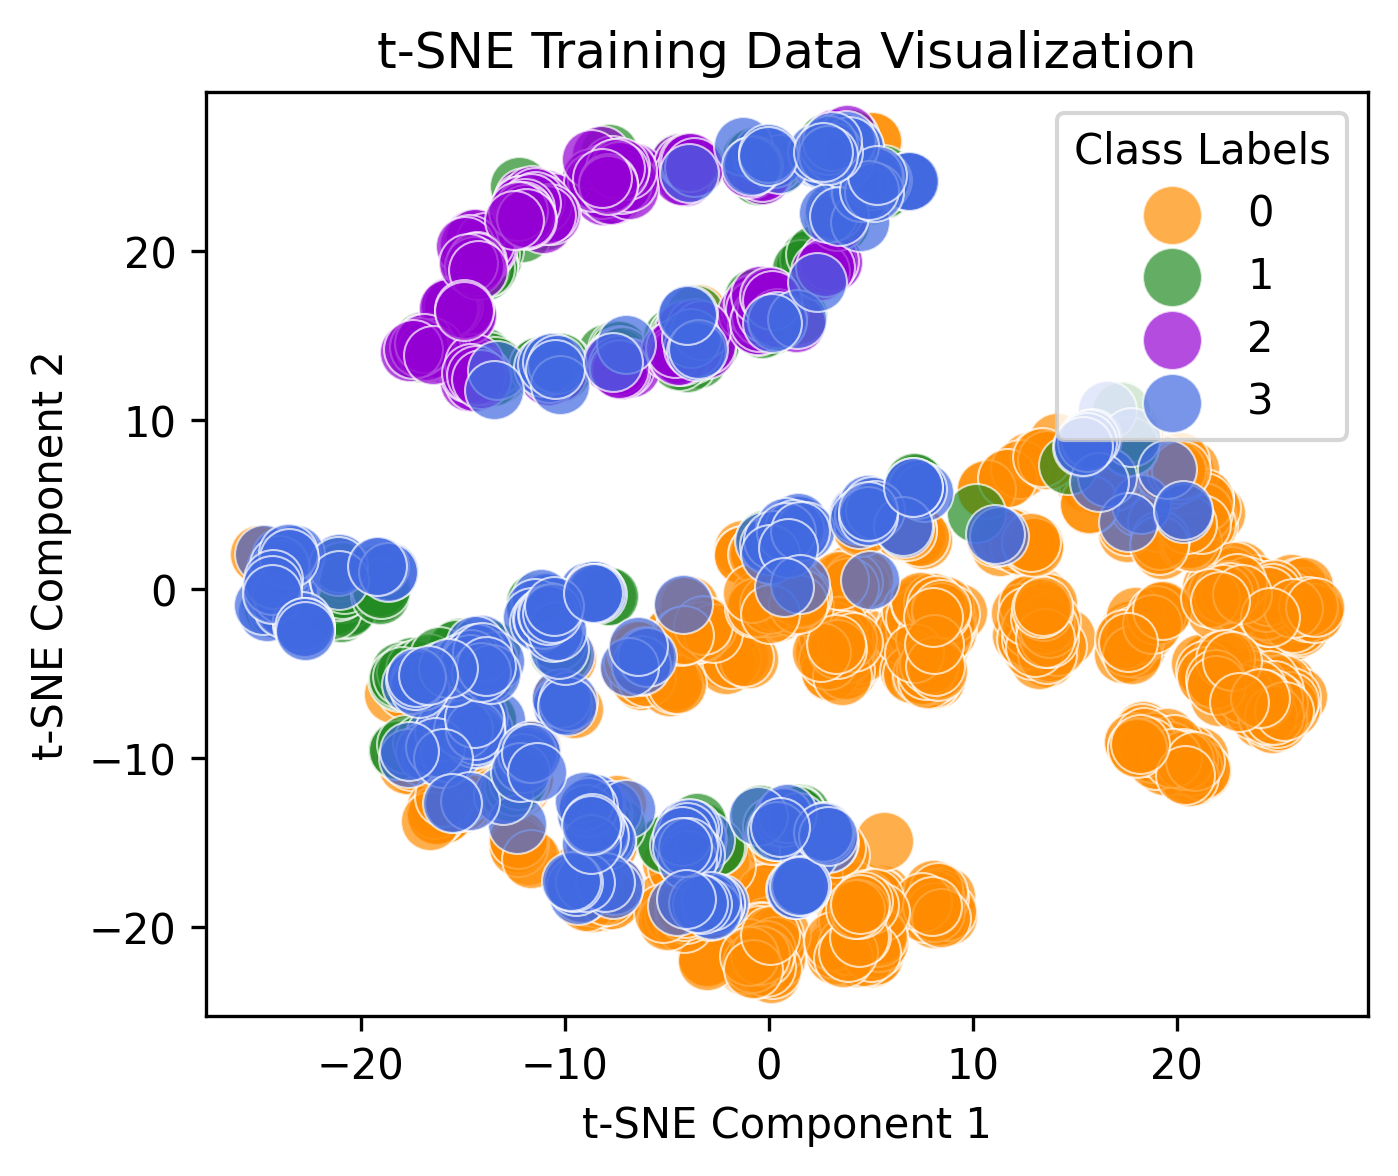

In [ ]:
from sklearn.manifold import TSNE

# Make visualization pipeline for TSNE
# Adjust the parameters so the visual looks nice


# Fit & Transform the Data


# Plot each target class separately with a label
# plt.figure(figsize=(5, 4), dpi=300)
# colors = ['darkorange', 'forestgreen', 'darkviolet', 'royalblue']


#############################
visual_pipeline = make_pipeline(
    preprocessor,
    TSNE(n_components=2, perplexity = 100, learning_rate =50, n_iter =1000, random_state=42)
)

X_transformed = visual_pipeline.fit_transform(X, y)

plt.figure(figsize=(5, 4), dpi=300)
colors = ['darkorange', 'forestgreen', 'darkviolet', 'royalblue']
for i, color in enumerate(colors):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                color=color, label=i, alpha=0.7, edgecolor='w', s=200, lw=0.5)

plt.legend(title='Class Labels')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Training Data Visualization')
plt.show()

### UMAP

In [ ]:
!pip install umap-learn -q

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<Figure size 1500x1200 with 0 Axes>

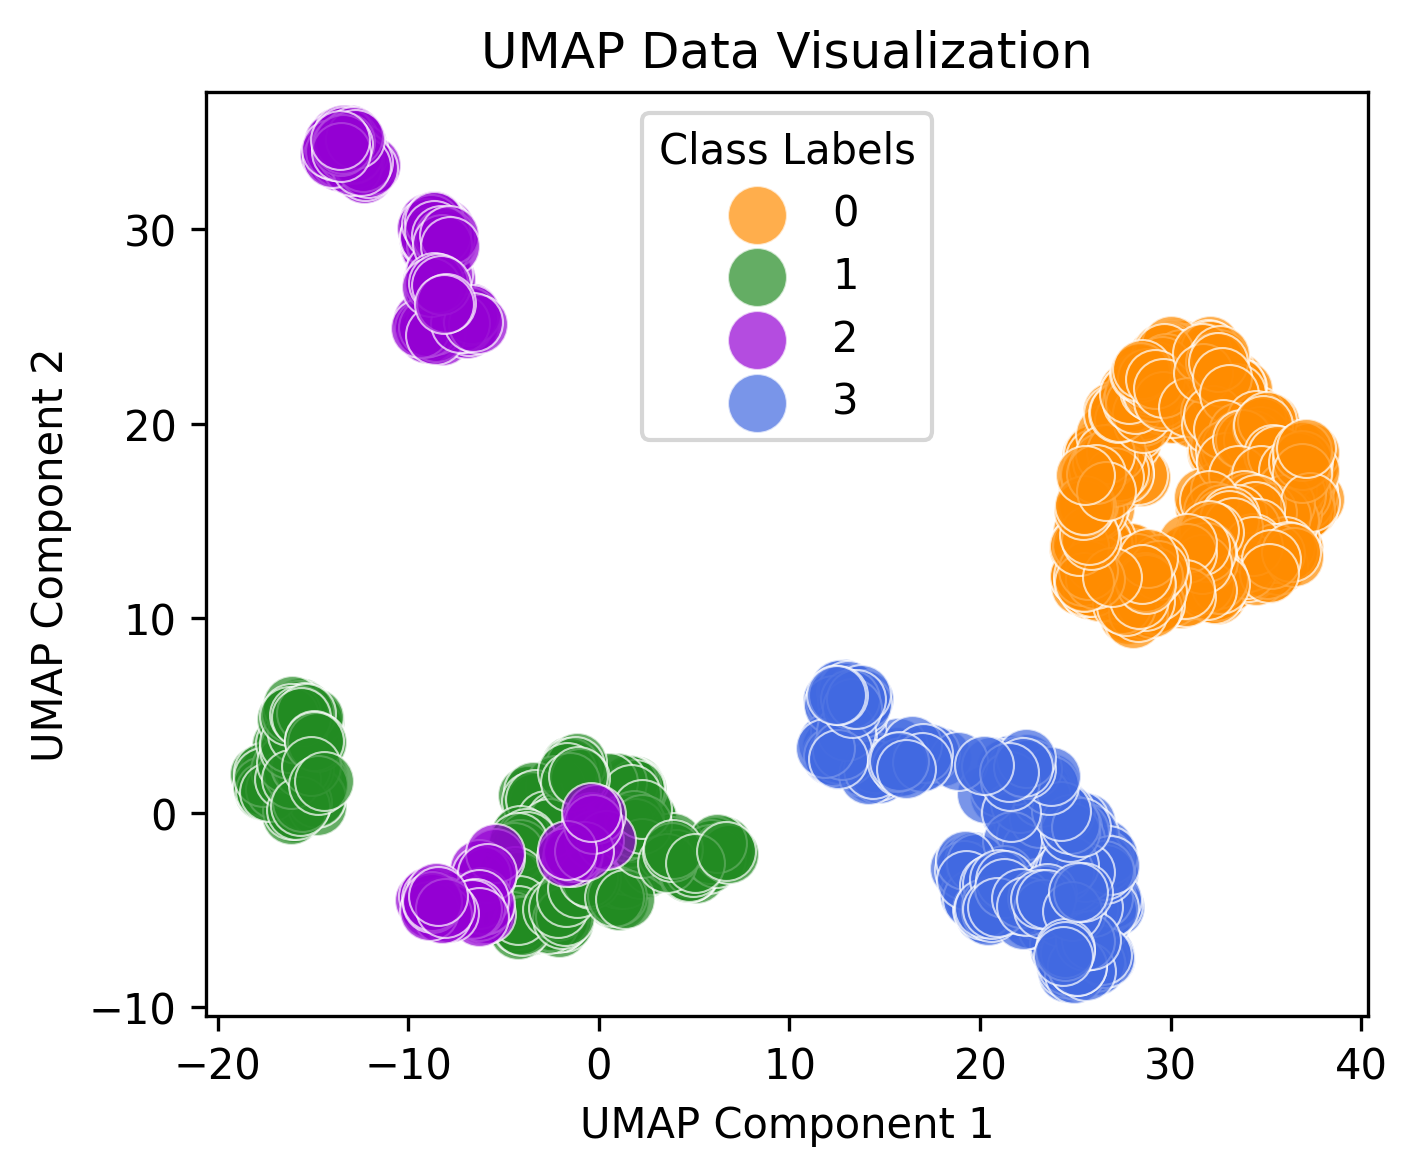

In [ ]:
from umap import UMAP

# Make visualization pipeline for UMAP
# Adjust the parameters so the visual looks nice


# Fit & Transform the Data


# Plot each target class separately with a label
# plt.figure(figsize=(5, 4), dpi=300)
# colors = ['darkorange', 'forestgreen', 'darkviolet', 'royalblue']

#################
visual_pipeline = make_pipeline(
    preprocessor,
    UMAP(n_neighbors=100, min_dist=1, random_state=42)
)

# Fit & Transform the Data
X_transformed = visual_pipeline.fit_transform(X, y)

# Visualize
plt.figure(figsize=(5, 4), dpi=300)

# Plot each class separately with a label
plt.figure(figsize=(5, 4), dpi=300)
colors = ['darkorange', 'forestgreen', 'darkviolet', 'royalblue']
for i, color in enumerate(colors):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                color=color, label=i, alpha=0.7, edgecolor='w', s=200, lw=0.5)

plt.legend(title='Class Labels')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP Data Visualization')
plt.show()